In [1]:
!pip install keras-unet-collection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.1 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras_unet_collection import models, losses
import tensorflow as tf
from datetime import datetime
import cv2
import random
from PIL import Image

# **Dataset Directory**

In [4]:
# Define paths to our training, test, and validation Images
train_image_directory = '/kaggle/input/sign-datasets/Sign-datasets/train/noisy'
test_image_directory = '/kaggle/input/sign-datasets/Sign-datasets/test/noisy'
validation_image_directory = '/kaggle/input/sign-datasets/Sign-datasets/val/noisy'

# Define paths to our training, test, and validation Masks
train_masks_directory = '/kaggle/input/sign-datasets/Sign-datasets/train/clean'
test_masks_directory = '/kaggle/input/sign-datasets/Sign-datasets/test/clean'
validation_masks_directory = '/kaggle/input/sign-datasets/Sign-datasets/val/clean'

# **Train dataset**

In [5]:
train_image_dataset = []
train_mask_dataset = []
SIZE = 224  # Assuming the desired size for the images is 64x64

train_images = os.listdir(train_image_directory)
for i, image_name in enumerate(train_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(os.path.join(train_image_directory, image_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        train_image_dataset.append(np.array(image))

train_masks = os.listdir(train_masks_directory)
for i, image_name in enumerate(train_masks):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(os.path.join(train_masks_directory, image_name), 3)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        train_mask_dataset.append(np.array(image))

# Normalize images
train_image_data = np.array(train_image_dataset) / 255.0
# Rescale masks to 0 to 1
train_mask_data = np.array(train_mask_dataset) / 255.0

In [6]:
train_image_data.shape

(1056, 224, 224, 3)

In [7]:
train_mask_data.shape

(1056, 224, 224, 3)

# **Checking random images from train dataset**

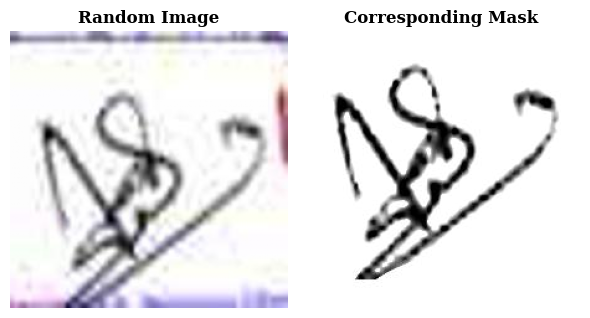

In [8]:
# Display a random image along with its mask
random_index = random.randint(0, len(train_image_data) - 1)
random_image = train_image_data[random_index]
random_mask = train_mask_data[random_index]

plt.figure(figsize=(6, 4))

# Display the random image
plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.title('Random Image',fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
plt.axis('off')

# Display the corresponding mask
plt.subplot(1, 2, 2)
plt.imshow(random_mask[:, :, 0], cmap='gray')  # Assuming the mask is a single-channel image
plt.title('Corresponding Mask',fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
plt.axis('off')

plt.tight_layout()
plt.show()

# **Test Dataset**

In [9]:
test_image_dataset = []
test_mask_dataset = []
SIZE = 224  # Assuming the desired size for the images is 64x64

test_images = os.listdir(test_image_directory)
for i, image_name in enumerate(test_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(os.path.join(test_image_directory, image_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        test_image_dataset.append(np.array(image))

test_masks = os.listdir(test_masks_directory)
for i, image_name in enumerate(test_masks):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(os.path.join(test_masks_directory, image_name), 3)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        test_mask_dataset.append(np.array(image))

# Normalize images
test_image_data = np.array(test_image_dataset) / 255.0
# Rescale masks to 0 to 1
test_mask_data = np.array(test_mask_dataset) / 255.0

# **Checking random images from test dataset**

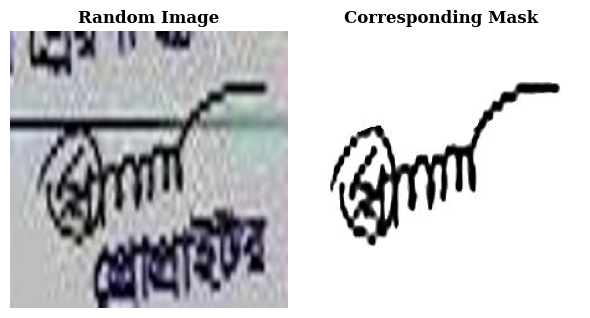

In [10]:
# Display a random image along with its mask
random_index = random.randint(0, len(test_image_data) - 1)
random_image = test_image_data[random_index]
random_mask = test_mask_data[random_index]

plt.figure(figsize=(6, 4))

# Display the random image
plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.title('Random Image',fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
plt.axis('off')

# Display the corresponding mask
plt.subplot(1, 2, 2)
plt.imshow(random_mask[:, :, 2], cmap='gray')  # Assuming the mask is a single-channel image
plt.title('Corresponding Mask',fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
plt.axis('off')

plt.tight_layout()
plt.show()

# **Validation Dataset**

In [11]:
validation_image_dataset = []
validation_mask_dataset = []
SIZE = 224  # Assuming the desired size for the images is 64x64

validation_images = os.listdir(test_image_directory)
for i, image_name in enumerate(validation_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(os.path.join(test_image_directory, image_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        validation_image_dataset.append(np.array(image))

validation_masks = os.listdir(test_masks_directory)
for i, image_name in enumerate(test_masks):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(os.path.join(test_masks_directory, image_name), 3)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        validation_mask_dataset.append(np.array(image))

# Normalize images
validation_image_data = np.array(validation_image_dataset) / 255.0
# Rescale masks to 0 to 1
validation_mask_data = np.array(validation_mask_dataset) / 255.0

# **Checking random images from validation dataset**

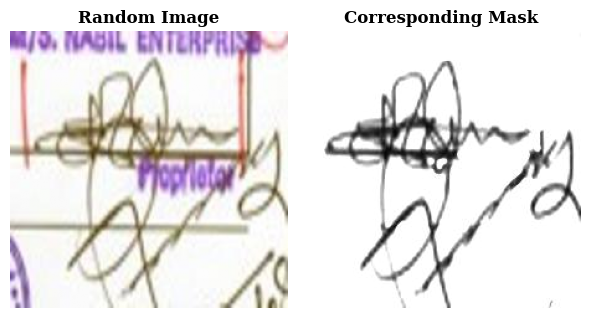

In [12]:
# Display a random image along with its mask
random_index = random.randint(0, len(validation_image_data) - 1)
random_image = validation_image_data[random_index]
random_mask = validation_mask_data[random_index]

plt.figure(figsize=(6, 4))

# Display the random image
plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.title('Random Image',fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
plt.axis('off')

# Display the corresponding mask
plt.subplot(1, 2, 2)
plt.imshow(random_mask[:, :, 0], cmap='gray')  # Assuming the mask is a single-channel image
plt.title('Corresponding Mask',fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
plt.axis('off')

plt.tight_layout()
plt.show()

# **Segmnetation Model: Swin-UNET**


In [14]:
help(models.swin_unet_2d)

Help on function swin_unet_2d in module keras_unet_collection._model_swin_unet_2d:

swin_unet_2d(input_size, filter_num_begin, n_labels, depth, stack_num_down, stack_num_up, patch_size, num_heads, window_size, num_mlp, output_activation='Softmax', shift_window=True, name='swin_unet')
    The base of SwinUNET.
    
    ----------
    Cao, H., Wang, Y., Chen, J., Jiang, D., Zhang, X., Tian, Q. and Wang, M., 2021. 
    Swin-Unet: Unet-like Pure Transformer for Medical Image Segmentation. arXiv preprint arXiv:2105.05537.
    
    Input
    ----------
        input_size: the size/shape of network input, e.g., `(128, 128, 3)`.
        filter_num_begin: number of channels in the first downsampling block; 
                          it is also the number of embedded dimensions.
        n_labels: number of output labels.
        depth: the depth of Swin-UNET, e.g., depth=4 means three down/upsampling levels and a bottom level.
        stack_num_down: number of convolutional layers per downsampli

In [13]:
!pip install --upgrade keras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3


In [14]:
###############################################################################
IMG_HEIGHT = 224
IMG_WIDTH  = 224
IMG_CHANNELS = 3
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
batch_size = 1
num_labels = 3  # Set this to 3 for RGB output

model_SwinUNET = models.att_unet_2d((224, 224, 3), filter_num=[64, 128, 256, 512, 1024], n_labels=3, 
                           stack_num_down=2, stack_num_up=2, activation='ReLU', 
                           atten_activation='ReLU', attention='add', output_activation='Sigmoid', 
                           batch_norm=True, pool=False, unpool=False, 
                           backbone='VGG16', weights='imagenet', 
                           freeze_backbone=True, freeze_batch_norm=True, 
                           name='attunet')

model_SwinUNET.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.001),
              metrics=['accuracy', losses.dice_coef])

print(model_SwinUNET.summary())

/opt/conda/lib/python3.10/site-packages/keras_unet_collection/_backbone_zoo.py:45: UserWarning: 

Backbone VGG16 does not use batch norm, but other layers received batch_norm=True
  warnings.warn(param_mismatch);


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "attunet_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ VGG16_backbone      │ [(None, 224, 224, │ 14,714,688 │ input_layer[0][0] │
│ (Functional)        │ 64), (None, 112,  │            │                   │
│                     │ 112, 128), (None, │            │                   │
│                     │ 56, 56, 256),     │            │                   │
│                     │ (None, 28, 28,    │            │                   │
│                     │ 512), (None, 14,  │            │                   │
│                     │ 14, 512)]         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_decode… │ (None, 28, 28,    │  2,359,808 │ VGG16_backbone[0… │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_decode… │ (None, 28, 28,    │      2,048 │ attunet_up0_deco… │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_decode… │ (None, 28, 28,    │          0 │ attunet_up0_deco… │
│ (ReLU)              │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_att_th… │ (None, 28, 28,    │    131,328 │ VGG16_backbone[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_att_ph… │ (None, 28, 28,    │    131,328 │ attunet_up0_deco… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_att_add │ (None, 28, 28,    │          0 │ attunet_up0_att_… │
│ (Add)               │ 256)              │            │ attunet_up0_att_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_att_ac… │ (None, 28, 28,    │          0 │ attunet_up0_att_… │
│ (ReLU)              │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_att_ps… │ (None, 28, 28, 1) │        257 │ attunet_up0_att_… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_att_si… │ (None, 28, 28, 1) │          0 │ attunet_up0_att_… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_att_ma… │ (None, 28, 28,    │          0 │ VGG16_backbone[0… │
│ (Multiply)          │ 512)              │            │ attunet_up0_att_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_concat  │ (None, 28, 28,    │          0 │ attunet_up0_deco… │
│ (Concatenate)       │ 1024)             │            │ attunet_up0_att_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_conv_a… │ (None, 28, 28,    │  4,718,592 │ attunet_up0_conc… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attunet_up0_conv_a… │ (None, 28, 28,    │      2,048 │ attunet_up0_conv… │
│ (BatchNormalizatio… │ 512)              │            │                 

 Total params: 28,384,871 (108.28 MB)

 Trainable params: 13,664,423 (52.13 MB)

 Non-trainable params: 14,720,448 (56.15 MB)

None


# **Training starts here...**

In [15]:
from keras.callbacks import ModelCheckpoint

# Specify the file path where the weights will be saved
checkpoint_filepath = '/kaggle/working/your_model_weights.weights.h5'

# Create a ModelCheckpoint callback to save only the weights
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_dice_coef',  # You can change this to 'val_accuracy' or any other metric
    save_best_only=True,  # Save only the best weights
    save_weights_only=True,  # Save only the model weights, not the entire model
    mode='max',  # 'min' for loss, 'max' for accuracy, 'auto' to infer automatically
    verbose=1
)


In [16]:
train_image_data.shape

(1056, 224, 224, 3)

In [17]:
train_mask_data.shape

(1056, 224, 224, 3)

In [48]:
start1 = datetime.now()

SwinUNET_history = model_SwinUNET.fit(train_image_data, train_mask_data,
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(train_image_data, train_mask_data),
                    shuffle=False,
                    callbacks=[model_checkpoint],                  
                    epochs=200)

stop1 = datetime.now()
#Execution time of the model
execution_time_Unet = stop1-start1
print("UNet execution time is: ", execution_time_Unet)


Epoch 1/200
1055/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4224 - dice_coef: 0.9807 - loss: 0.0569
Epoch 1: val_dice_coef did not improve from 0.96757
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 57s 54ms/step - accuracy: 0.4224 - dice_coef: 0.9807 - loss: 0.0569 - val_accuracy: 0.2465 - val_dice_coef: 0.9671 - val_loss: 0.1249
Epoch 2/200
1055/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3758 - dice_coef: 0.9807 - loss: 0.0570
Epoch 2: val_dice_coef did not improve from 0.96757
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 53s 50ms/step - accuracy: 0.3759 - dice_coef: 0.9807 - loss: 0.0570 - val_accuracy: 0.2899 - val_dice_coef: 0.9672 - val_loss: 0.1260
Epoch 3/200
1055/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3796 - dice_coef: 0.9806 - loss: 0.0574
Epoch 3: val_dice_coef did not improve from 0.96757
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 53s 50ms/step - accuracy: 0.3797 - dice_coef: 0.9806 - loss: 0.0574 - val_accuracy: 0.2703 - val_dice_coef: 0.9671 - val_loss: 0.1254
Epoch 4/200
1055/10

In [49]:
model_SwinUNET.save('/kaggle/working/fundus_SwinUNET_model.h5')  # Saves architecture + weights

# **Saved the trained model for the 1st time**

In [ ]:
from tensorflow.keras.models import load_model
# Assuming 'model_TransUNET' is our trained UNet model
model_SwinUNET.save('/kaggle/working/fundus_SwinUNET_model_checkpoint.hdf5')

In [ ]:
model_SwinUNET.save_weights("model.weights.h5")
print("Saved model to disk")

# **Load the trained model for training again**

In [25]:
loaded_model = model_SwinUNET.load_weights('/kaggle/working/fundus_SwinUNET_model.h5')

In [26]:
# To load the saved model later
loaded_model = model_SwinUNET.load_weights('/kaggle/working/your_model_weights.weights.h5')
#model_old_path = '/kaggle/working/fundus_SwinUNET_model_checkpoint.hdf5'

In [27]:
# # evaluate loaded model on test data
model_SwinUNET.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy', losses.dice_coef])

In [28]:
SwinUNET_history = model_SwinUNET.fit(train_image_data, train_mask_data,
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(train_image_data, train_mask_data),
                    shuffle=False,
                    callbacks=[model_checkpoint],                  
                    epochs=50)

stop1 = datetime.now()
#Execution time of the model
execution_time_Unet = stop1-start1
print("UNet execution time is: ", execution_time_Unet)


Epoch 1/50
1055/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2812 - dice_coef: 0.9735 - loss: 0.0846
Epoch 1: val_dice_coef did not improve from 0.96476
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 68s 53ms/step - accuracy: 0.2812 - dice_coef: 0.9735 - loss: 0.0846 - val_accuracy: 0.1844 - val_dice_coef: 0.9623 - val_loss: 0.1581
Epoch 2/50
1055/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2935 - dice_coef: 0.9742 - loss: 0.0817
Epoch 2: val_dice_coef did not improve from 0.96476
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 51s 48ms/step - accuracy: 0.2935 - dice_coef: 0.9742 - loss: 0.0817 - val_accuracy: 0.3336 - val_dice_coef: 0.9625 - val_loss: 0.1489
Epoch 3/50
1055/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2793 - dice_coef: 0.9740 - loss: 0.0821
Epoch 3: val_dice_coef did not improve from 0.96476
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 51s 48ms/step - accuracy: 0.2793 - dice_coef: 0.9740 - loss: 0.0821 - val_accuracy: 0.2774 - val_dice_coef: 0.9617 - val_loss: 0.1693
Epoch 4/50
1055/1056 ━

In [ ]:
model_SwinUNET.save('/kaggle/working/updated_fundus_SwinUNET_model.h5')  # Saves architecture + weights

In [ ]:
from tensorflow.keras.models import load_model
# Assuming 'model_TransUNET' is our trained UNet model
model_SwinUNET.save('/kaggle/working/fundus_SwinUNET_model_checkpoint_updated.hdf5')

In [ ]:
model_SwinUNET.save_weights("updated_model.weights.h5")
print("Saved model to disk")

# Load the model again

In [ ]:
# To load the saved model later
loaded_model = model_SwinUNET.load_weights('/kaggle/working/updated_model.weights.h5')
#model_old_path = '/kaggle/working/fundus_SwinUNET_model_checkpoint.hdf5'

In [ ]:
# # evaluate loaded model on test data
model_SwinUNET.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy', losses.dice_coef])

In [ ]:
SwinUNET_history = model_SwinUNET.fit(train_image_data, train_mask_data,
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(train_image_data, train_mask_data),
                    shuffle=False,
                    callbacks=[model_checkpoint],                  
                    epochs=100)

stop1 = datetime.now()
#Execution time of the model
execution_time_Unet = stop1-start1
print("UNet execution time is: ", execution_time_Unet)


In [ ]:
from tensorflow.keras.models import load_model
# Assuming 'model_TransUNET' is our trained UNet model
model_SwinUNET.save('/kaggle/working/fundus_SwinUNET_model_checkpoint_2updated.hdf5')

In [ ]:
model_SwinUNET.save_weights("updated2_model.weights.h5")
print("Saved model to disk")

In [ ]:
model_SwinUNET.load_weights(model_old_path)

In [ ]:
model_SwinUNET

# **Plotting Accuracy vs Loss Graph**

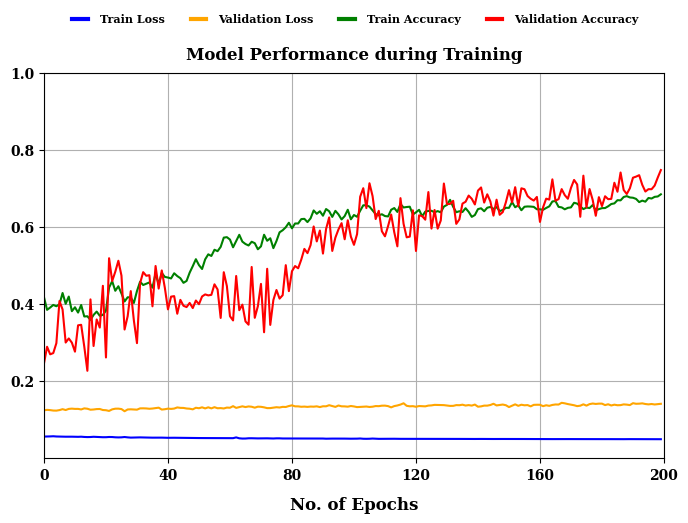

In [50]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

# Plot training & validation loss values
plt.figure(figsize=(8, 5))

#Check history plots, one model at a time
history = SwinUNET_history
# Plot Loss
train_loss, = plt.plot(history.history['loss'], label='Train Loss', color='blue')
val_loss, = plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
train_accuracy, = plt.plot(history.history['accuracy'], label='Train Accuracy',  color='green')
val_accuracy, = plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')


# Add a title with specified font properties
plt.title('Model Performance during Training', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12},pad=10)
# Set x-axis label with specified font properties
plt.xlabel('No. of Epochs', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})

# Set x-axis ticks font properties
plt.xticks(np.linspace(0, len(history.history['loss']), num=6), fontname='Serif', weight='bold')

# Set y-axis ticks font properties
plt.yticks(np.linspace(0.2, 1, num=5), fontname='Serif', weight='bold')

# Set the x-axis and y-axis limits
plt.xlim(0, len(history.history['loss']))
plt.ylim(0, 1)

# Define custom legend lines with desired line properties
legend_lines = [
    Line2D([0], [0], color='blue', lw=3),          # Train Loss
    Line2D([0], [0], color='orange', lw=3),       # Validation Loss
    Line2D([0], [0], color='green', lw=3),        # Train Accuracy
    Line2D([0], [0], color='red', lw=3)           # Validation Accuracy
]

# Place legend outside the graph by adjusting bbox_to_anchor and specifying it to be outside the axes
plt.legend(legend_lines, ['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'],
           loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=5,
           prop={'family': 'Serif', 'weight': 'bold', 'size': 8}, frameon=False,
           handler_map={Line2D: HandlerLine2D(numpoints=5)})

# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space


# Display gridlines for better readability
plt.grid(True)
plt.show()


In [ ]:
SwinUNET_history

# **Checking prediction on images from Test Dataset**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


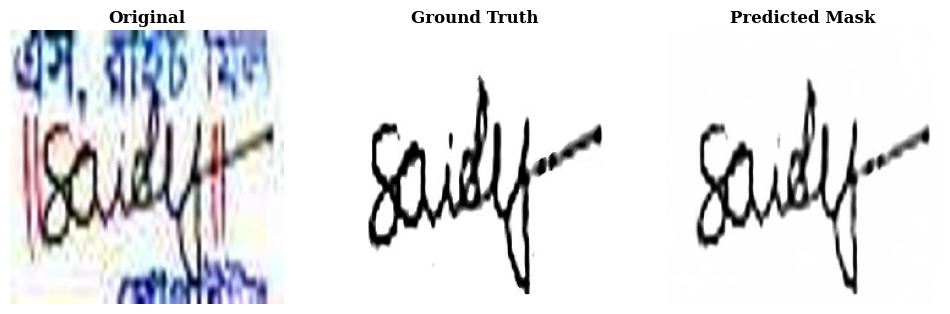

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming model_SwinUNET is already defined and trained
model = model_SwinUNET

# Test image number (change this index as needed)
test_img_number = 10

# Fetch the test image and corresponding ground truth
test_img = train_image_data[test_img_number]
ground_truth = train_mask_dataset[test_img_number]

# Expand dimensions if required for the model input
test_img_input = np.expand_dims(test_img, axis=0)  # Expand for batch size
prediction = model.predict(test_img_input)  # Get model prediction

# Assuming the prediction has an extra dimension (like shape (1, 224, 224, 1)), you need to squeeze it
prediction = np.squeeze(prediction)  # Remove the extra dimensions

# If the prediction needs normalization for visualization
prediction = (prediction - np.min(prediction)) / (np.max(prediction) - np.min(prediction))

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Display the original test image
axs[0].imshow(test_img, cmap='gray')
axs[0].set_title('Original', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
axs[0].axis('off')

# Display the ground truth mask
axs[1].imshow(ground_truth[:, :, 0], cmap='gray')
axs[1].set_title('Ground Truth', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
axs[1].axis('off')

# Display the predicted mask
axs[2].imshow(prediction, cmap='gray')
axs[2].set_title('Predicted Mask', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
axs[2].axis('off')

# Save the plotted images as a PDF
plt.savefig('/kaggle/working/sw_FIVES_prediction_images1_.pdf', format='pdf')

# Show the plot
plt.show()


****

Input image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction shape: (1, 224, 224, 3)


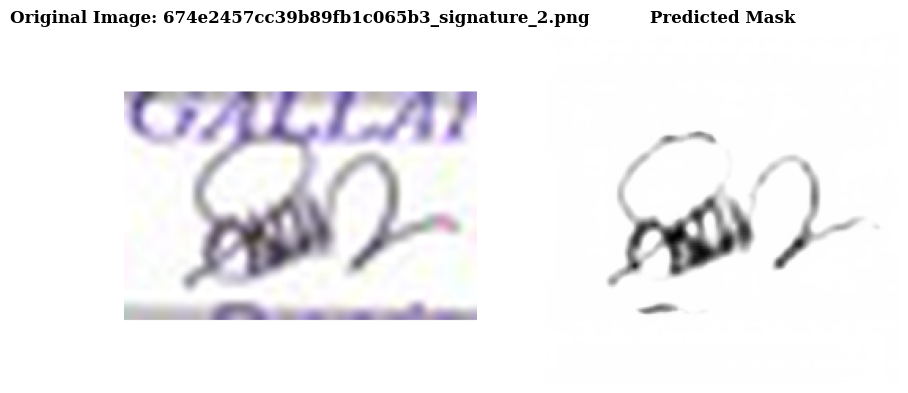

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Assuming model_SwinUNET is already defined and trained
model = model_SwinUNET

# Load a random image from a specific directory (for Kaggle, you can upload a folder of images)
image_dir = '/kaggle/input/testing/testing'  # Set your input folder for random images
image_files = os.listdir(image_dir)
random_image_file = random.choice(image_files)  # Choose a random image

# Load the image
image_path = os.path.join(image_dir, random_image_file)
img = Image.open(image_path)

# Check if the image is grayscale and convert to RGB if necessary
if img.mode != 'RGB':
    img = img.convert('RGB')

# Resize the image to match the model input (224x224)
img_resized = img.resize((224, 224))

# Convert the image to a numpy array and normalize it (values between 0 and 1)
img_array = np.array(img_resized) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

# Print out the input shape to debug
print(f"Input image shape: {img_array.shape}")

# Make prediction with the trained model
prediction = model.predict(img_array)

# Print out the prediction shape to debug
print(f"Prediction shape: {prediction.shape}")

# Squeeze prediction to remove any extra dimensions
prediction = np.squeeze(prediction)

# Normalize prediction for better visualization
prediction = (prediction - np.min(prediction)) / (np.max(prediction) - np.min(prediction))

# Set up the plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original test image
axs[0].imshow(img_resized)
axs[0].set_title(f'Original Image: {random_image_file}', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
axs[0].axis('off')

# Display the predicted mask
axs[1].imshow(prediction, cmap='gray')
axs[1].set_title('Predicted Mask', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
axs[1].axis('off')

# Save the plot as a PDF (you can save it directly on Kaggle for viewing)
output_pdf_path = '/kaggle/working/random_image_prediction.pdf'
plt.savefig(output_pdf_path, format='pdf')

# Show the plot
plt.show()


In [93]:
test_img_input.shape

(1, 224, 224, 3)

In [ ]:
prediction

# **Segmentation Evaluation Metrics**
* Intersection over Union (IoU)
* Dice Coefficient
* Pixel Accuracy
* Surface Dice Overlap
* Modified Hausdorff Distance

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def m_iou(y_true, y_pred):
    y_true_float = K.cast(y_true, dtype=tf.float32)
    y_pred_float = K.cast(K.round(y_pred), dtype=tf.float32)

    intersection = K.sum(K.abs(y_true_float * y_pred_float))
    union = K.sum(y_true_float) + K.sum(y_pred_float) - intersection
    iou = intersection / (union + K.epsilon())
    
    return iou

In [ ]:
def dice_coeff(y_true, y_pred):
    y_true_float = K.cast(y_true, dtype=tf.float32)
    y_pred_float = K.cast(K.round(y_pred), dtype=tf.float32)
    
    intersection = K.sum(y_true_float * y_pred_float)
    union = K.sum(y_true_float) + K.sum(y_pred_float)
    dice = (2. * intersection) / (union + K.epsilon())
    return dice

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from skimage.measure import label, regionprops
from scipy.spatial.distance import directed_hausdorff

# Initialize lists to store evaluation metrics for each image
IoU_values = []
dice_coefficient_values = []
pixel_accuracy_values = []
modified_hausdorff_distance_values = []

n_classes = 2  # Assuming binary segmentation

for img in range(0, test_image_data.shape[0]):
    temp_img = test_image_data[img]
    ground_truth = test_mask_data[img]
    temp_img_input = np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)

    y_true= ground_truth[:, :, 0]
    y_pred=prediction
    y_true_float = K.cast(y_true, dtype=tf.float32)
    y_pred_float = K.cast(K.round(y_pred), dtype=tf.float32)
    # Intersection over Union (IoU)
    intersection = K.sum(y_true_float * y_pred_float)
    
    iou = m_iou(ground_truth[:, :, 0], prediction)
    IoU_values.append(iou)

    # # Dice Coefficient
    dice = dice_coeff(ground_truth[:, :, 0], prediction)
    dice_coefficient_values.append(dice)
    # Dice Coefficient
    #dice = (2 * np.sum(intersection)) / (np.sum(ground_truth[:, :, 0]) + np.sum(prediction))
    dice_coefficient_values.append(dice)
    
    # Pixel Accuracy
    pixel_accuracy = np.sum(intersection) / np.sum(ground_truth[:, :, 0])
    pixel_accuracy_values.append(pixel_accuracy)
    
    

    # Modified Hausdorff Distance
    hausdorff_distance = directed_hausdorff(ground_truth[:, :, 0], prediction)[0]
    modified_hausdorff_distance_values.append(hausdorff_distance)

# Calculate mean values for all metrics
mean_IoU = np.mean(IoU_values)
mean_dice_coefficient = np.mean(dice_coefficient_values)
mean_pixel_accuracy = np.mean(pixel_accuracy_values)
mean_modified_hausdorff_distance = np.mean(modified_hausdorff_distance_values)


In [ ]:
surface_dice_overlap_values = []

n_classes = 2  # Assuming binary segmentation

for img in range(0, test_image_data.shape[0]):
    temp_img = test_image_data[img]
    ground_truth = test_mask_data[img]
    temp_img_input = np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)

    # Surface Dice Overlap (Assuming binary images)
    labeled_true = label(ground_truth[:, :, 0])
    labeled_pred = label(prediction)
    props_true = regionprops(labeled_true)
    props_pred = regionprops(labeled_pred)

    # Calculate Surface Dice Overlap for each pair of regions
    dice_overlap_sum = 0
    pairs_count = 0

    for p in props_true:
        for q in props_pred:
            intersection = np.logical_and(labeled_true == p.label, labeled_pred == q.label)
            if np.sum(intersection) > 0:
                dice_overlap = 2 * np.sum(intersection) / (np.sum(labeled_true == p.label) + np.sum(labeled_pred == q.label))
                dice_overlap_sum += dice_overlap
                pairs_count += 1

    surface_dice_overlap = dice_overlap_sum / pairs_count if pairs_count > 0 else 0
    surface_dice_overlap_values.append(surface_dice_overlap)

# Calculate mean value for surface dice overlap
mean_surface_dice_overlap = np.mean(surface_dice_overlap_values)



# **Print mean values of Evaluation metrics**

In [ ]:
# Print mean values
print("Mean Intersection over Union (IoU):", mean_IoU)
print("Mean Dice Coefficient:", mean_dice_coefficient)
print("Mean Pixel Accuracy:", mean_pixel_accuracy)
print("Mean Modified Hausdorff Distance:", mean_modified_hausdorff_distance)
print("Mean Surface Dice Overlap:", mean_surface_dice_overlap)